## Lab: Classification and Esemble methods

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV


# 1. Load and preprocess the dataset.


In [2]:
df = pd.read_csv("loan_train.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [4]:
#drop extra column.

df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], axis = 1, inplace = True)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [5]:
#check null values
df.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [6]:
df[df.duplicated()].count()

loan_status       40
Principal         40
terms             40
effective_date    40
due_date          40
age               40
education         40
Gender            40
dtype: int64

Can see that we have some duplicated values, however I will not remove these. I think that there are a chance that we would get similar values in this case. Ex there are probably many male, that has a college education which want a loan etc.

In [7]:
df.dtypes

loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

## Check data and explore data

Text(0.5, 1.0, 'Distribution of Principal and education')

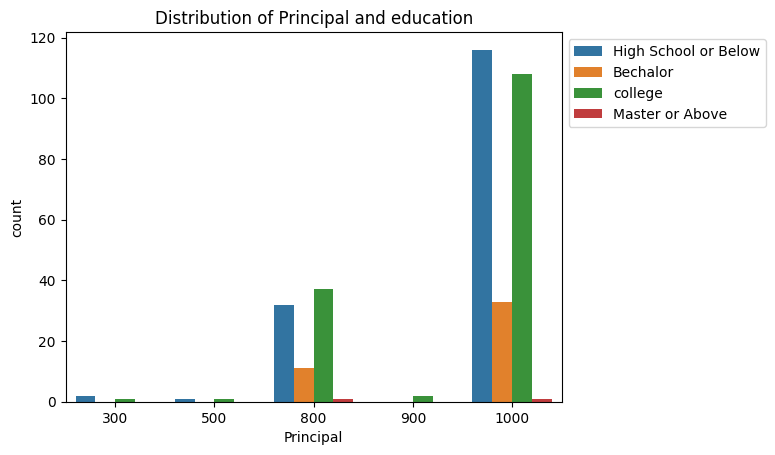

In [8]:
sns.countplot(data = df, x ="Principal", hue = "education")
plt.legend(loc="upper left", bbox_to_anchor = (1,1))
plt.title("Distribution of Principal and education")

Text(0.5, 1.0, 'Distribution of loan status and education')

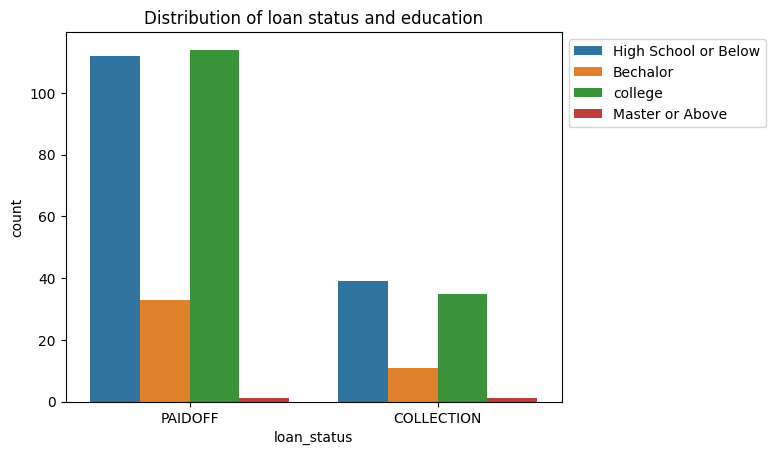

In [9]:
sns.countplot(data = df, x = "loan_status", hue ="education")
plt.legend(loc="upper left", bbox_to_anchor = (1,1))
plt.title("Distribution of loan status and education")

Most of the people have a higher principal and in all education levels except for master and above, which seems to be low. The loan status distribution for education does indicate the most of the people have paid off the loan and the education seems not to matter.

Text(0.5, 1.0, 'Gender distribution')

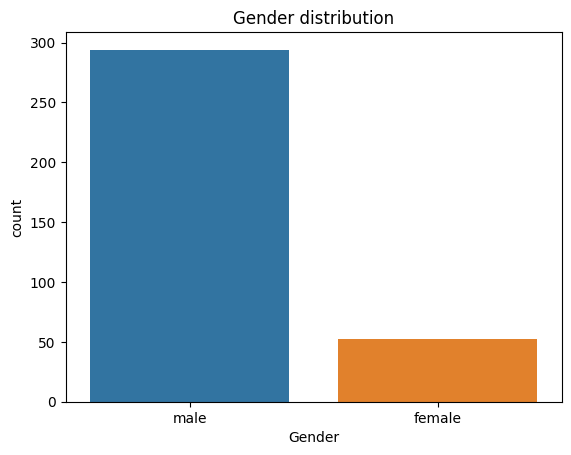

In [10]:
sns.countplot(data = df, x = "Gender")
plt.title("Gender distribution")

Text(0.5, 1.0, 'Principal distribution by gender')

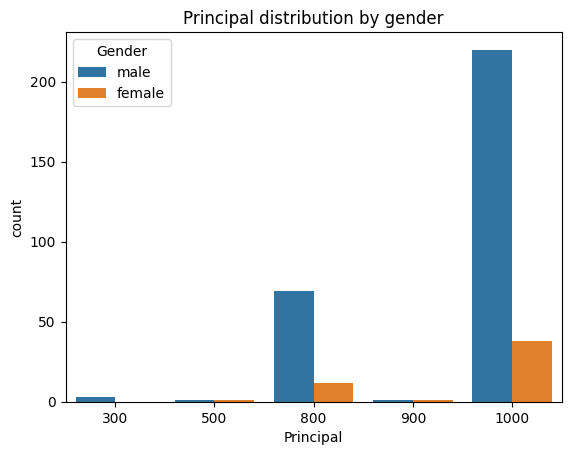

In [11]:
sns.countplot(data = df, x="Principal", hue = "Gender")
plt.title("Principal distribution by gender")

Text(0.5, 1.0, 'Loan status distribution by gender')

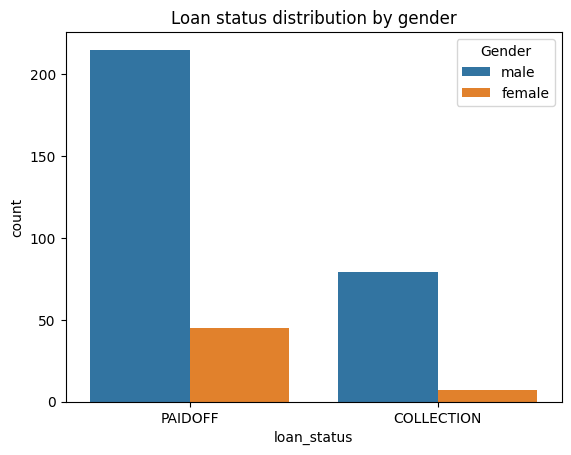

In [12]:
sns.countplot(data = df, x ="loan_status", hue = "Gender")
plt.title("Loan status distribution by gender")

Can see that there are more males than females, and this is also represented in the other graphs. There are more people who have a higher principal, and in all cases, these are dominated by men.

For loan status, the distribution is the same where there is more males. For both gender is there more paid off than collection.

Text(0.5, 1.0, 'Principal vs age groups and gender')

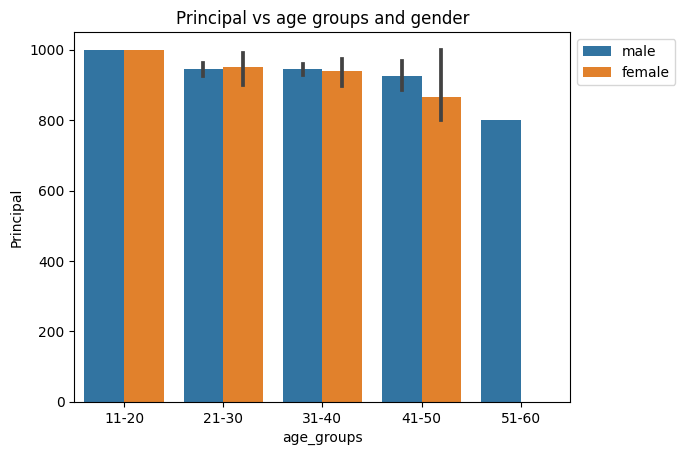

In [13]:
age_groups = ["11-20","21-30","31-40","41-50","51-60"]
df["age_groups"] = pd.cut(df.age, range(10,61,10), labels = age_groups)
sns.barplot(data = df, x ="age_groups", y ="Principal", hue = "Gender")

plt.legend(loc="upper left", bbox_to_anchor = (1,1))
plt.title("Principal vs age groups and gender")

Can see that on average does the age group 21-30 have a higher principal. The gender seems not to matter to much, both female and male have the similar average principal. No female in age group 51-60.

Text(0.5, 1.0, 'Distribution of loan status and age groups')

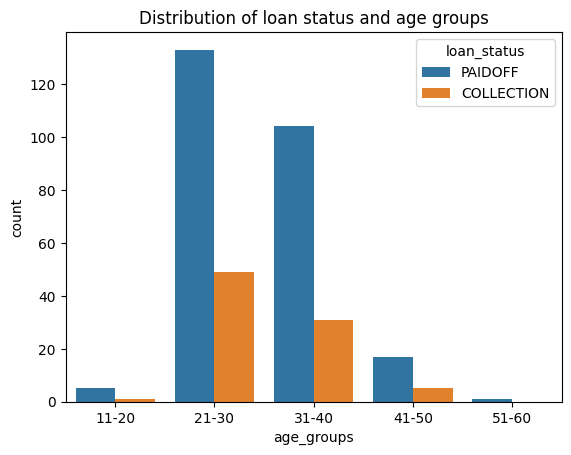

In [14]:
sns.countplot(data = df, x = "age_groups", hue = "loan_status")
plt.title("Distribution of loan status and age groups")

Similar distribution as before, most of the people have a higher paidoff then collection.

Text(0.5, 1.0, 'Age distribution and loan status')

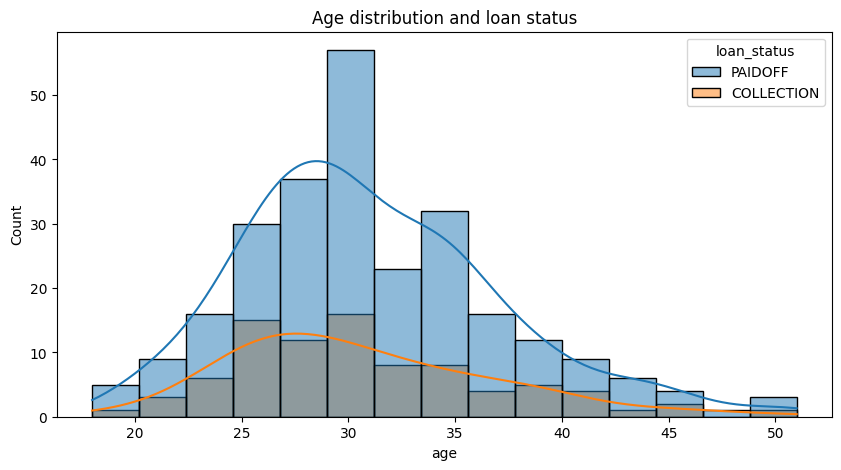

In [15]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = "age", hue = "loan_status",kde = True)
plt.title("Age distribution and loan status")

Here we can see that the age is somewhat normaly distributed. In most of the cases is the loan status also represented as before. For each age the paidoff is larger then the collection, and in all values are the proportions similar.

## Preprocessing of the data

In [16]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender', 'age_groups'],
      dtype='object')

In [17]:
for i in df[["loan_status","education", "Gender"]].columns:
    print(f"{i}: {df[i].unique()}")

loan_status: ['PAIDOFF' 'COLLECTION']
education: ['High School or Below' 'Bechalor' 'college' 'Master or Above']
Gender: ['male' 'female']



    
    Loan statud: Paidoff = 1, Collection = 0

    education: High schoole or below = 0, bachalor: 1, college: 2, master or above: 3

    Gender: male = 1, female = 0
    

In [18]:
def changeGen(gen, change, change2, change3):
    if gen == change:
        return 1
    elif gen == change2:
        return 2
    elif gen == change3:
        return 3
    else:
        return 0

df["loan_status"] = df["loan_status"].apply(changeGen, args = ("PAIDOFF", None, None,)) #paidoff = 1
df["Gender"] = df["Gender"].apply(changeGen, args = ("male", None, None, ))
df["education"] = df["education"].apply(changeGen, args = ("Bechalor", "college", "Master or Above"))
# bachalor = 1, collage = 2, master or above = 3, high schoole or belove = 0
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_groups
0,1,1000,30,9/8/2016,10/7/2016,45,0,1,41-50
1,1,1000,30,9/8/2016,10/7/2016,33,1,0,31-40
2,1,1000,15,9/8/2016,9/22/2016,27,2,1,21-30
3,1,1000,30,9/9/2016,10/8/2016,28,2,0,21-30
4,1,1000,30,9/9/2016,10/8/2016,29,2,1,21-30
...,...,...,...,...,...,...,...,...,...
341,0,800,15,9/11/2016,9/25/2016,32,0,1,31-40
342,0,1000,30,9/11/2016,10/10/2016,25,0,1,21-30
343,0,800,15,9/12/2016,9/26/2016,39,2,1,31-40
344,0,1000,30,9/12/2016,11/10/2016,28,2,1,21-30


### Change and encode date
Here I will transform the dates to days between effective date and due date. To get a better picture of how many days there are between.


In [19]:
date_format = "%m/%d/%Y"

def calculateDate(row):
  effectiveDate = datetime.strptime(row["effective_date"], date_format)
  dueDate = datetime.strptime(row["due_date"], date_format)
  days = (dueDate - effectiveDate).days

  return days

df["effect_due_days"] = df.apply(calculateDate, axis = 1)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_groups,effect_due_days
0,1,1000,30,9/8/2016,10/7/2016,45,0,1,41-50,29
1,1,1000,30,9/8/2016,10/7/2016,33,1,0,31-40,29
2,1,1000,15,9/8/2016,9/22/2016,27,2,1,21-30,14
3,1,1000,30,9/9/2016,10/8/2016,28,2,0,21-30,29
4,1,1000,30,9/9/2016,10/8/2016,29,2,1,21-30,29
...,...,...,...,...,...,...,...,...,...,...
341,0,800,15,9/11/2016,9/25/2016,32,0,1,31-40,14
342,0,1000,30,9/11/2016,10/10/2016,25,0,1,21-30,29
343,0,800,15,9/12/2016,9/26/2016,39,2,1,31-40,14
344,0,1000,30,9/12/2016,11/10/2016,28,2,1,21-30,59


###Check values

In [20]:
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_groups,effect_due_days
0,1,1000,30,9/8/2016,10/7/2016,45,0,1,41-50,29
1,1,1000,30,9/8/2016,10/7/2016,33,1,0,31-40,29
2,1,1000,15,9/8/2016,9/22/2016,27,2,1,21-30,14
3,1,1000,30,9/9/2016,10/8/2016,28,2,0,21-30,29
4,1,1000,30,9/9/2016,10/8/2016,29,2,1,21-30,29
...,...,...,...,...,...,...,...,...,...,...
341,0,800,15,9/11/2016,9/25/2016,32,0,1,31-40,14
342,0,1000,30,9/11/2016,10/10/2016,25,0,1,21-30,29
343,0,800,15,9/12/2016,9/26/2016,39,2,1,31-40,14
344,0,1000,30,9/12/2016,11/10/2016,28,2,1,21-30,59


In [21]:
df[["Principal","terms","age","education","effect_due_days"]].describe()

,Principal,terms,age,education,effect_due_days
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306,1.005780,23.361272
std,109.425530,7.991006,6.039418,0.944839,10.602958
min,300.000000,7.000000,18.000000,0.000000,6.000000
25%,900.000000,15.000000,27.000000,0.000000,14.000000
50%,1000.000000,30.000000,30.000000,1.000000,29.000000
75%,1000.000000,30.000000,35.000000,2.000000,29.000000
max,1000.000000,30.000000,51.000000,3.000000,59.000000


The values are not scailed, will test with minmax scaling.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


features = ["loan_status","Principal","terms","age","education","Gender","effect_due_days"]

for feature in features:
    transform = scaler.fit_transform(df[[feature]])
    df[feature] = transform

df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_groups,effect_due_days
0,1.0,1.000000,1.000000,9/8/2016,10/7/2016,0.818182,0.000000,1.0,41-50,0.433962
1,1.0,1.000000,1.000000,9/8/2016,10/7/2016,0.454545,0.333333,0.0,31-40,0.433962
2,1.0,1.000000,0.347826,9/8/2016,9/22/2016,0.272727,0.666667,1.0,21-30,0.150943
3,1.0,1.000000,1.000000,9/9/2016,10/8/2016,0.303030,0.666667,0.0,21-30,0.433962
4,1.0,1.000000,1.000000,9/9/2016,10/8/2016,0.333333,0.666667,1.0,21-30,0.433962
...,...,...,...,...,...,...,...,...,...,...
341,0.0,0.714286,0.347826,9/11/2016,9/25/2016,0.424242,0.000000,1.0,31-40,0.150943
342,0.0,1.000000,1.000000,9/11/2016,10/10/2016,0.212121,0.000000,1.0,21-30,0.433962
343,0.0,0.714286,0.347826,9/12/2016,9/26/2016,0.636364,0.666667,1.0,31-40,0.150943
344,0.0,1.000000,1.000000,9/12/2016,11/10/2016,0.303030,0.666667,1.0,21-30,1.000000


<Axes: >

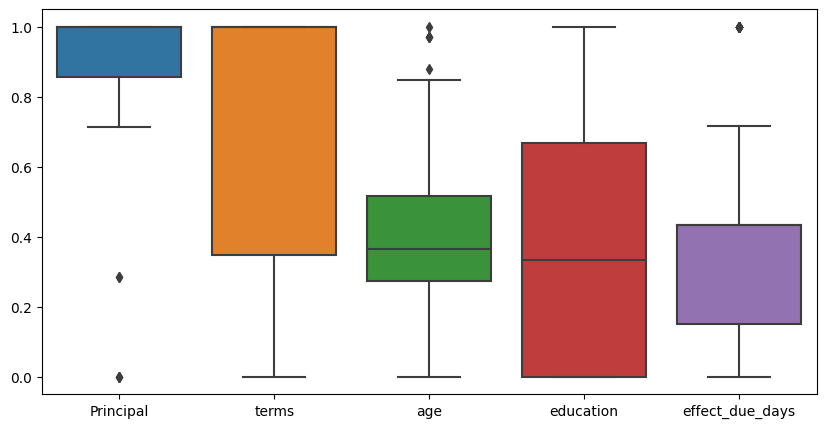

In [23]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df[["Principal","terms","age","education","effect_due_days"]])

Can see that age have some possible outliers,

I believe this is normal for the population, for a population would we have some values that are much higher.

I also think that for the days between effective date and due date also seems reasonable, I think the value is 59 days.

For Principal is much harder to understand. The value is zero does, it therefore seems reasonable that this is some error because borrowing zero seems wrong.

In [24]:
#for principle
df[df["Principal"] == 0]

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_groups,effect_due_days
8,1.0,0.0,0.0,9/10/2016,9/16/2016,0.333333,0.666667,1.0,21-30,0.0
153,1.0,0.0,0.0,9/12/2016,9/18/2016,0.333333,0.000000,1.0,21-30,0.0
176,1.0,0.0,0.0,9/12/2016,9/18/2016,0.151515,0.000000,1.0,21-30,0.0


Can see that these values does have zero principal, zero terms, and the same ffective and due date. The loan is paidoff the terms = 0 makes some sense. I belivie that these 3 rows are some kind of error. I could have take a mean value for principal, terms and effect_due_days, however I think this is to much guessing, thus I will remove these.

In [25]:
df.drop(df[df["Principal"] == 0].index, inplace = True)
df[df["Principal"] == 0]

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_groups,effect_due_days


### Balanced dataset?

As seen from the exploration of the data in the begining is the data not balanced. There are more paidoff loans than collective. This could potential affect the result.

In [26]:
df[df["loan_status"]==1]

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_groups,effect_due_days
0,1.0,1.000000,1.000000,9/8/2016,10/7/2016,0.818182,0.000000,1.0,41-50,0.433962
1,1.0,1.000000,1.000000,9/8/2016,10/7/2016,0.454545,0.333333,0.0,31-40,0.433962
2,1.0,1.000000,0.347826,9/8/2016,9/22/2016,0.272727,0.666667,1.0,21-30,0.150943
3,1.0,1.000000,1.000000,9/9/2016,10/8/2016,0.303030,0.666667,0.0,21-30,0.433962
4,1.0,1.000000,1.000000,9/9/2016,10/8/2016,0.333333,0.666667,1.0,21-30,0.433962
...,...,...,...,...,...,...,...,...,...,...
255,1.0,1.000000,1.000000,9/14/2016,10/13/2016,0.545455,0.333333,1.0,31-40,0.433962
256,1.0,0.714286,0.347826,9/14/2016,9/28/2016,0.272727,0.666667,1.0,21-30,0.150943
257,1.0,1.000000,1.000000,9/14/2016,10/13/2016,0.333333,0.000000,1.0,21-30,0.433962
258,1.0,1.000000,1.000000,9/14/2016,10/13/2016,0.666667,0.000000,1.0,31-40,0.433962


In [27]:
df[df["loan_status"]==0]

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_groups,effect_due_days
260,0.0,1.000000,0.347826,9/9/2016,9/23/2016,0.333333,0.666667,1.0,21-30,0.150943
261,0.0,1.000000,1.000000,9/9/2016,10/8/2016,0.575758,0.000000,1.0,31-40,0.433962
262,0.0,0.714286,0.347826,9/9/2016,9/23/2016,0.272727,0.666667,1.0,21-30,0.150943
263,0.0,0.714286,0.347826,9/9/2016,9/23/2016,0.181818,0.333333,1.0,21-30,0.150943
264,0.0,0.714286,0.347826,9/10/2016,10/9/2016,0.303030,0.666667,1.0,21-30,0.433962
...,...,...,...,...,...,...,...,...,...,...
341,0.0,0.714286,0.347826,9/11/2016,9/25/2016,0.424242,0.000000,1.0,31-40,0.150943
342,0.0,1.000000,1.000000,9/11/2016,10/10/2016,0.212121,0.000000,1.0,21-30,0.433962
343,0.0,0.714286,0.347826,9/12/2016,9/26/2016,0.636364,0.666667,1.0,31-40,0.150943
344,0.0,1.000000,1.000000,9/12/2016,11/10/2016,0.303030,0.666667,1.0,21-30,1.000000


As we can see will there be more paid off loans then collections. Because we have such small number of instances, I believe that it is not good to remove values to get a balanced dataset. Thus, to evaluate the models can accuracy be misleading. A better representation is to use the ROC curve and AUC (The area under the curve). A higher AUC would indicate on a better classification model. However, for a really imbalanced dataset can the ROC curve and AUC also be misleading. I don’t think this is the case here. 25% of the total number of rows are class 0, thus not too much of an imbalance.


Source: https://www.youtube.com/watch?v=QBVzZBsif20
      https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

# 2 and 3 Model test

- 2: Apply three different classification algorithms of your choice (e.g., logistic regression,
KNN, Decision Tree, SVM, etc.).
-  Evaluate and discuss the performance of each classification algorithm using relevant
metrics (e.g., confusion matrix, accuracy, classification report, etc.)


I want to classify load status, thus if a person has paidoff their loan or if its in collection.
Paidoff = 1
Collection = 0

### Methods I will be using

In [28]:
#gets both the plot and auc score
def createROCCURVE(y_test, y_score):
  fale_positive, true_positive, threshold = roc_curve(y_test, y_score)
  plt.plot(fale_positive, true_positive)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

  roc_auc = roc_auc_score(y_test, y_score)
  print(f"AUC score: {roc_auc}")

def getYscore(model, x_t, y_t, x_tes):
  model.fit(x_t, y_t)

  y_score = model.predict_proba(x_tes)[:,1]

  return y_score

def getROCAUC(y_test, y_score):
  false_positive, true_positive, treshold = roc_curve(y_test, y_score)
  auc = roc_auc_score(y_test, y_score)

  return false_positive, true_positive, auc



In [29]:
#get classification values
df_class = df[["Principal","terms","age","education","Gender","effect_due_days"]]
df_pred = df[["loan_status"]]

## Test with SVM
Testing without hyperparameters.

In [30]:
#split data
x_train, x_test, y_train, y_test = train_test_split(df_class, df_pred.loan_status, test_size = 0.3, random_state = 42 )

print(x_train.shape, y_train.shape)

(240, 6) (240,)


In [31]:
model = svm.SVC()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred, zero_division= 0)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        24
         1.0       0.76      0.97      0.86        79

    accuracy                           0.75       103
   macro avg       0.38      0.49      0.43       103
weighted avg       0.58      0.75      0.66       103



Text(50.722222222222214, 0.5, 'Actual Values')

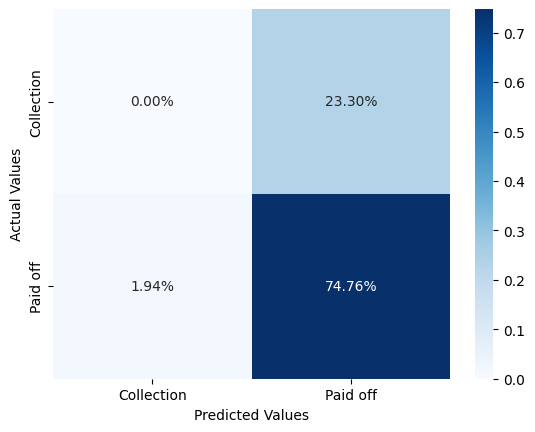

In [32]:
metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Collection","Paid off"],yticklabels = ["Collection","Paid off"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

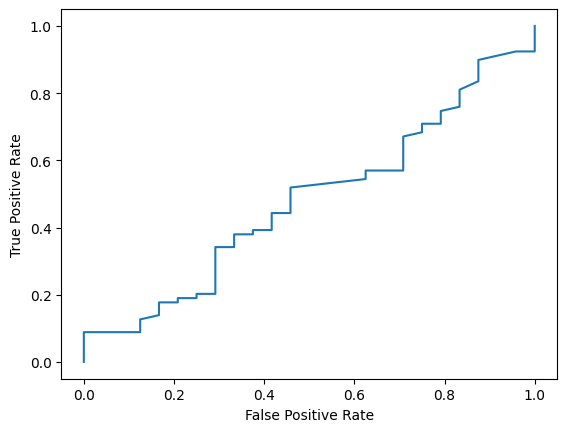

AUC score: 0.47916666666666663


In [33]:
#get roc and auc
model_roc = svm.SVC(probability = True)
y_score = getYscore(model_roc, x_train, y_train, x_test)

createROCCURVE(y_test, y_score)

As we can see are the auc score quite low, and the curve is almost diagonal which would indicate on a bad classification. One interesting point is that the models seem to be bad at predicting class 0 (collection) which can be seen with 0 in both recall and precision.
From the precision and recall can we see that it is bad at predicting class 0.

## Nearest Neighbour

In [34]:
ne = KNeighborsClassifier()
ne.fit(x_train, y_train)

y_pred = ne.predict(x_test)

In [35]:
reportNe = classification_report(y_test, y_pred)
print(reportNe)

              precision    recall  f1-score   support

         0.0       0.20      0.08      0.12        24
         1.0       0.76      0.90      0.83        79

    accuracy                           0.71       103
   macro avg       0.48      0.49      0.47       103
weighted avg       0.63      0.71      0.66       103



Text(50.722222222222214, 0.5, 'Actual Values')

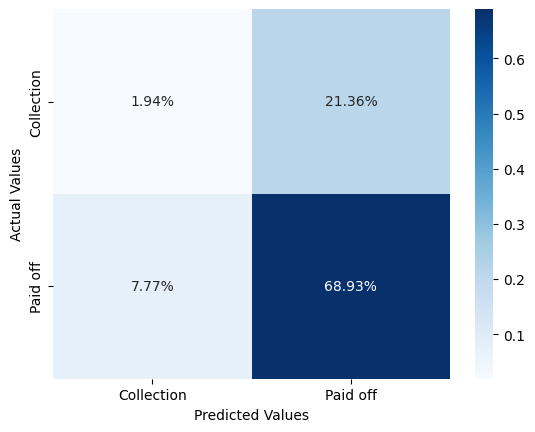

In [36]:
metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Collection","Paid off"],yticklabels = ["Collection","Paid off"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

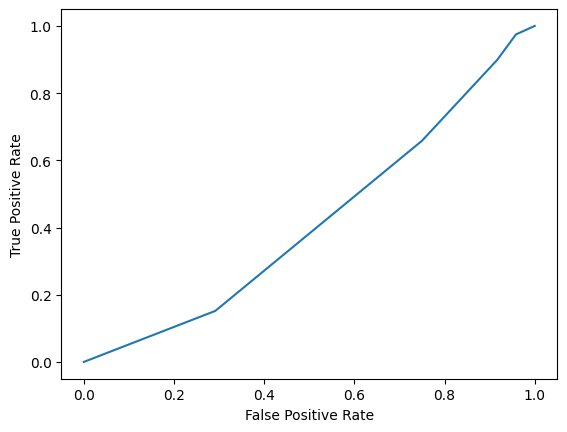

AUC score: 0.4177215189873418


In [37]:
#test with roc and auc
y_score_ne = getYscore(ne,x_train, y_train, x_test)

createROCCURVE(y_test, y_score_ne)

Same here, got a quite low auc score and diagonal line. Thus, this should also not be a good classifier. Again the model seems bad att predicit class 0, but here it did predict some values for it.

## Logistic regression


In [38]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)

reportlog = classification_report(y_test, y_pred, zero_division = 0)
print(reportlog)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        24
         1.0       0.77      1.00      0.87        79

    accuracy                           0.77       103
   macro avg       0.38      0.50      0.43       103
weighted avg       0.59      0.77      0.67       103



Text(50.722222222222214, 0.5, 'Actual Values')

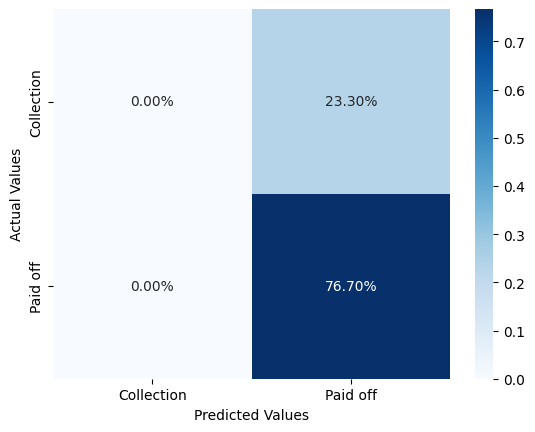

In [39]:
metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Collection","Paid off"],yticklabels = ["Collection","Paid off"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

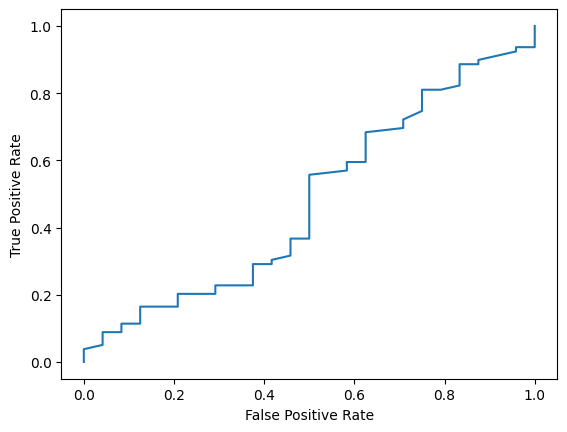

AUC score: 0.4796940928270042


In [40]:
#test with roc and auc
y_score_log = getYscore(log_model,x_train, y_train, x_test)

createROCCURVE(y_test, y_score_log)

Same again, low value for auc and the line is diagonal which is indicating on bad classifictiaon. Here did the recall and precision also be 0 which was the same as form svm.

## 4. Test with GridSearchCv
- Use GridSearchCV for hyperparameter tuning and compare the results with question 3 (confusion matrix, accuracy, classification report, etc.)

## SVM

In [41]:
parameters = {
    "C":[0.1,0.5, 1, 10],
    "kernel": ["linear","poly","rbf"],
    "gamma": [1, 0.1, 0.01, 0.001]
}
model = svm.SVC(probability = True)
grid = GridSearchCV(model,parameters)
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)
best_para = grid.best_params_
best_score = grid.best_score_
print(best_para)
print(best_score)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.7416666666666666


Text(50.722222222222214, 0.5, 'Actual Values')

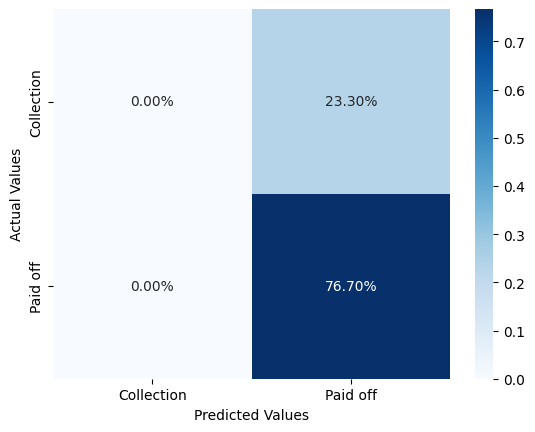

In [42]:
metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Collection","Paid off"],yticklabels = ["Collection","Paid off"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [43]:
report = classification_report(y_test, grid_predictions,zero_division= 0 )
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        24
         1.0       0.77      1.00      0.87        79

    accuracy                           0.77       103
   macro avg       0.38      0.50      0.43       103
weighted avg       0.59      0.77      0.67       103



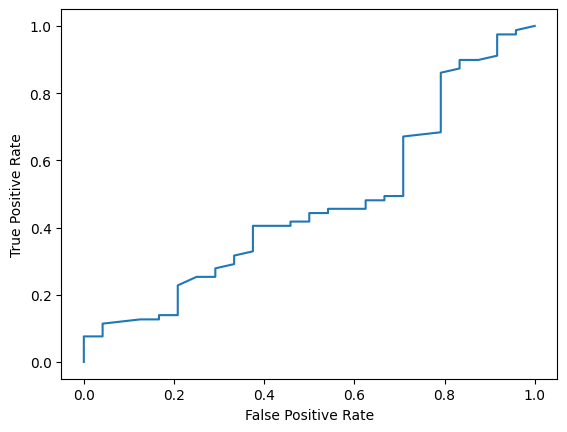

AUC score: 0.4680907172995781


In [44]:
#test with roc and auc
#create a new model where we use the probabilites
model_prob_svm = svm.SVC(kernel ="linear",gamma = 1, C = 0.1, probability = True)
y_score_svm = getYscore(model_prob_svm,x_train, y_train, x_test)

createROCCURVE(y_test, y_score_svm)

Still get low value, even if we use the gridsearch to search for the best parameters.

## Nearest Neighbour

In [45]:
parameters = {
    "n_neighbors":[1, 5, 10, 15, 20],
    "weights": ["uniform","distance"],
    "algorithm": ["ball_tree","kd_tree","brute","auto"],
    "leaf_size":[10, 20, 30, 40, 50]
}
model = KNeighborsClassifier()
grid = GridSearchCV(model,parameters)
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)
best_para = grid.best_params_
best_score = grid.best_score_
print(best_para)
print(best_score)

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 15, 'weights': 'uniform'}
0.7541666666666667


Text(50.722222222222214, 0.5, 'Actual Values')

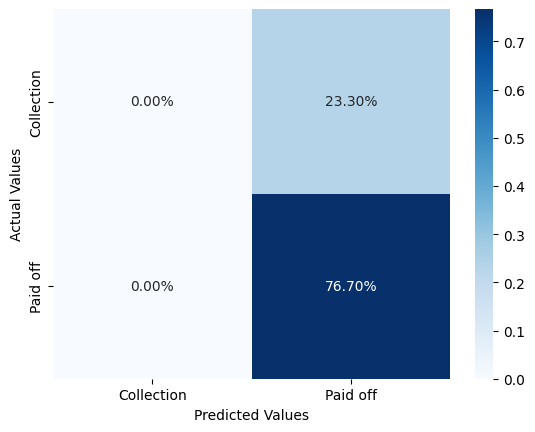

In [46]:
metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Collection","Paid off"],yticklabels = ["Collection","Paid off"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [47]:
report = report = classification_report(y_test, grid_predictions,zero_division= 0 )
print(report)

              precision    recall  f1-score   support

         0.0       0.33      0.04      0.07        24
         1.0       0.77      0.97      0.86        79

    accuracy                           0.76       103
   macro avg       0.55      0.51      0.47       103
weighted avg       0.67      0.76      0.68       103



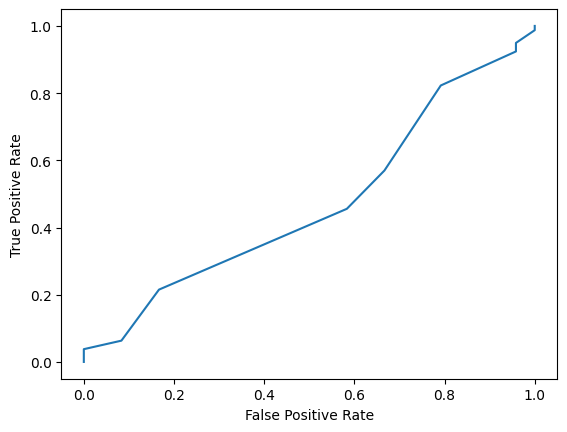

AUC score: 0.4712552742616034


In [48]:
#test with roc and auc
#create a new model where we use the probabilites
model_prob_near = KNeighborsClassifier(algorithm = "ball_tree",leaf_size = 10,n_neighbors = 20,weights= "uniform")
y_score_near = getYscore(model_prob_near,x_train, y_train, x_test)

createROCCURVE(y_test, y_score_near)

Here again I got quite bad result. It still has a problem to classify class 0.

## Logistic regression

In [49]:
parameters = {
    "penalty":["l1","l2","None"],
    "C": [0.001,0.01, 0.1, 1, 10],
    "max_iter":[100,1000, 2500],
    "solver":["lbfgs","liblinear","sag"]
}
model = LogisticRegression()
grid = GridSearchCV(model,parameters)
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
375 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

In [50]:
best_para = grid.best_params_
best_score = grid.best_score_
print(best_para)
print(best_score)

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.7458333333333333


Text(50.722222222222214, 0.5, 'Actual Values')

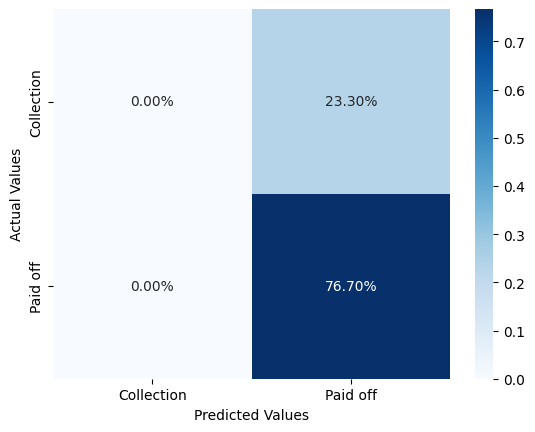

In [51]:
model_log = LogisticRegression(C = 10, max_iter=100, penalty = "l1", solver = "liblinear")

metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Collection","Paid off"],yticklabels = ["Collection","Paid off"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [52]:
report = classification_report(y_test, grid_predictions,zero_division= 0 )
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        24
         1.0       0.76      0.97      0.86        79

    accuracy                           0.75       103
   macro avg       0.38      0.49      0.43       103
weighted avg       0.58      0.75      0.66       103



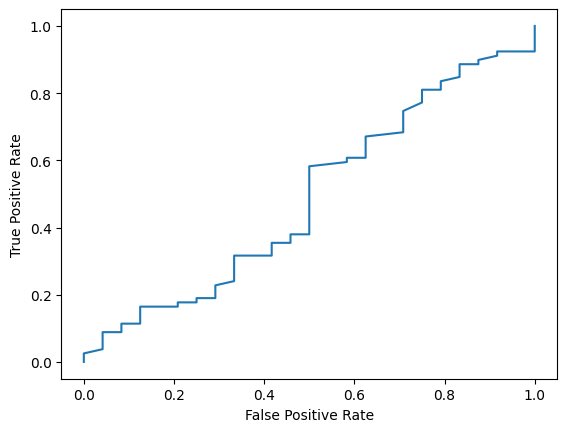

AUC score: 0.48839662447257387


In [53]:
model_log = LogisticRegression(C = 10, max_iter=100, penalty = "l1", solver = "liblinear")
y_score_log = getYscore(model_log,x_train, y_train, x_test)

createROCCURVE(y_test, y_score_log)

Here I still go a quite bad result, however.

## Comments

It seems that all three models are bad att classifying the paidoff and collections. This is also true when the gridsearch is used to find the best parameters. This could come from the fact that we have quite low number of values, thus the models can't be traind properly. The dataset is also imbalanced, which could affect the result.

#5. Bagging with decision tree classifier Random forest Classifier

- . Train a decision tree classifier using the bagging technique and compare it with the Random Forest Classifier.


From my understanding is Random Forest Classifier and extension of the bagging technique but will, at each bootstrap, not use all features which bagging will do. This will reduce the correlation between different decision tree classifiers. Thus, Random Forest and bagging with decision tree should produce similar results, more likely should random forest be a little better.

https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

I still have the problem with imbalanced dataset, thus I will use the roc_auc curve and score for evaluation.

## Decision Tree

In [54]:
bag_mod = BaggingClassifier(estimator = DecisionTreeClassifier(),n_estimators = 100, max_samples = 0.8, oob_score = True)

bag_mod.fit(x_train, y_train)

y_predic = bag_mod.predict(x_test)

Text(50.722222222222214, 0.5, 'Actual Values')

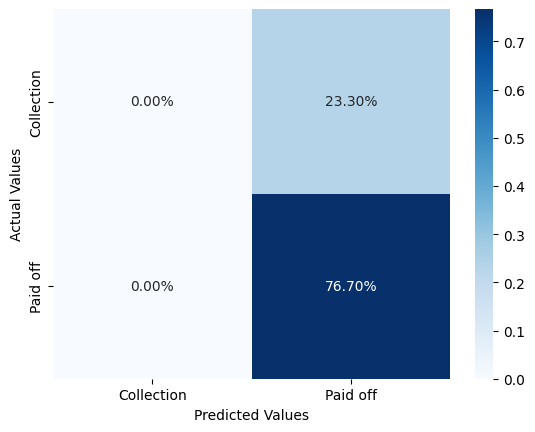

In [55]:
metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Collection","Paid off"],yticklabels = ["Collection","Paid off"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [56]:
report = classification_report(y_test, y_predic,zero_division= 0 )
print(report)

              precision    recall  f1-score   support

         0.0       0.21      0.12      0.16        24
         1.0       0.76      0.86      0.81        79

    accuracy                           0.69       103
   macro avg       0.49      0.49      0.48       103
weighted avg       0.64      0.69      0.66       103



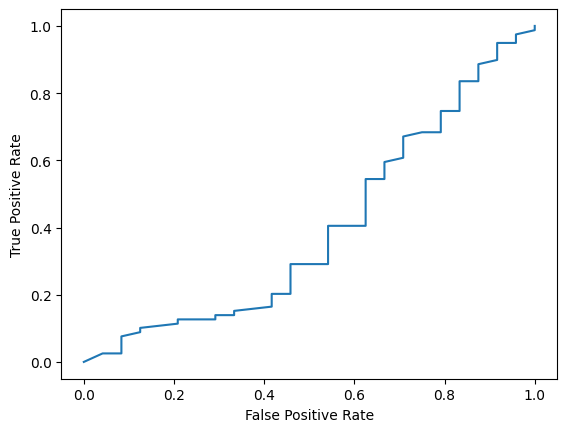

AUC score: 0.3979430379746835


In [57]:
y_score_tree = getYscore(bag_mod, x_train, y_train, x_test)

createROCCURVE(y_test, y_score_tree)

## Random forest classifier


In [58]:
random_model = RandomForestClassifier(n_estimators = 100, max_samples = 0.8)
random_model.fit(x_train, y_train)

y_predic_random = random_model.predict(x_test)

Text(50.722222222222214, 0.5, 'Actual Values')

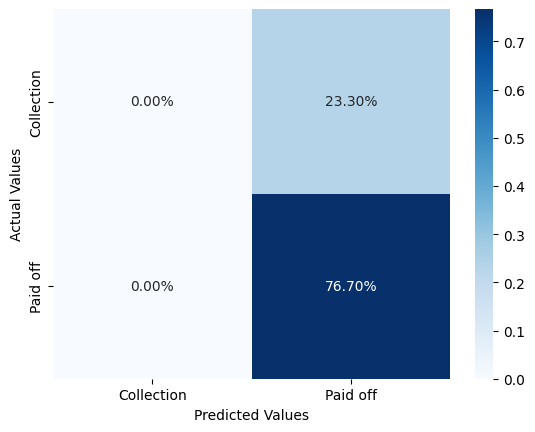

In [59]:
metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Collection","Paid off"],yticklabels = ["Collection","Paid off"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [60]:
report = classification_report(y_test, y_predic_random,zero_division= 0 )
print(report)

              precision    recall  f1-score   support

         0.0       0.31      0.21      0.25        24
         1.0       0.78      0.86      0.82        79

    accuracy                           0.71       103
   macro avg       0.55      0.53      0.53       103
weighted avg       0.67      0.71      0.69       103



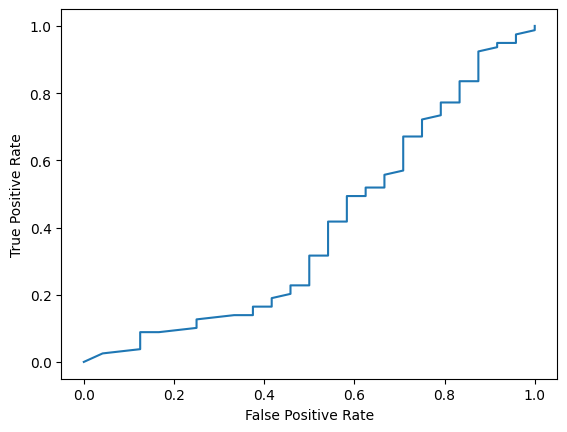

AUC score: 0.3968881856540084


In [61]:
y_score_random = getYscore(random_model, x_train, y_train, x_test)

createROCCURVE(y_test, y_score_random)

## Comment

Can see that the accuracy for both bagging with decision tree and the random forest produce similar results, where the accuracy is around 62 but the AUC score is quite bad. Random forest produce a slightly better result than bagging with decision tree, but not too much.
Both algorithms can classify class 0 which has been hard for the other but I think the main point here is that the random forest and bagging with decision tree shows similar result, which is expected.


# 6 Make predictions for future observations.
When grid seach was used, did all models performe better, thus will not use them that are not using gridsearch.

In [62]:
#create one graph to evaluate which performed best:
#the models are trained under gridsearchcv

#svm
y_score_svm = getYscore(model_prob_svm,x_train, y_train, x_test)

false_positive_svm, true_positive_svm, roc_auc_score_svm = getROCAUC(y_test, y_score_svm)

#Nearest Neighour
y_score_near = getYscore(model_prob_near,x_train, y_train, x_test)

false_positive_near, true_positive_near, roc_auc_score_near = getROCAUC(y_test, y_score_near)

#Logistic regression
y_score_log = getYscore(model_log, x_train, y_train, x_test)

false_positive_log, true_positive_log, roc_auc_score_log = getROCAUC(y_test, y_score_log)

#bagging decision tree
y_score_tree = getYscore(bag_mod, x_train, y_train, x_test)

false_positive_tree, true_positive_tree, roc_auc_score_tree = getROCAUC(y_test, y_score_tree)

#Random forest
y_score_random = getYscore(random_model, x_train, y_train, x_test)

false_positive_random, true_positive_random, roc_auc_score_random = getROCAUC(y_test, y_score_random)

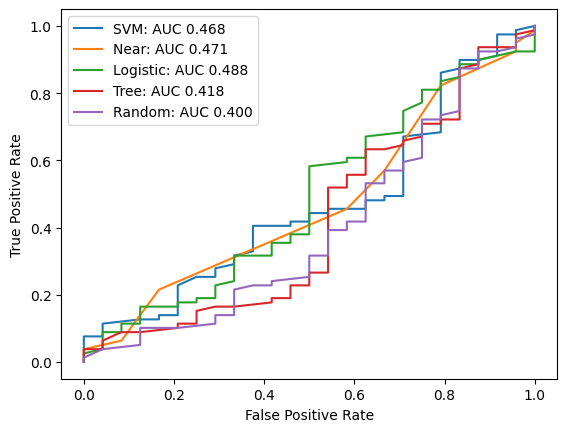

In [63]:
plt.plot(false_positive_svm, true_positive_svm, label = f"SVM: AUC {roc_auc_score_svm:.3f}")
plt.plot(false_positive_near, true_positive_near, label = f"Near: AUC {roc_auc_score_near:.3f}")
plt.plot(false_positive_log, true_positive_log, label = f"Logistic: AUC {roc_auc_score_log:.3f}")
plt.plot(false_positive_tree, true_positive_tree, label = f"Tree: AUC {roc_auc_score_tree:.3f}")
plt.plot(false_positive_random, true_positive_random, label = f"Random: AUC {roc_auc_score_random:.3f}")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


From AUC score does it seems that the Nearest Neighbour is the best performed model. However, if we look at the classification tabel and matrix will nearest neighbour be realy bad at predicting class 0, wheres Logistic regression can predict class 0. The difference between the two with AUC is almost nothing. Thus, I will use logistic regression for future predictions.

## Create fake data
- loan_state = 1 or 0
- principal = 1000, 800, 300, 900, 500
- terms: 30, 15, 7
- age = between 18 and 50
- education: High schoole or below = 0, bachalor: 1, college: 2, master or above: 3
- Gender = 1 or 0
- effect_due_day = 29, 14,  6, 13, 59, 44


I will try to make a new dataframe when random sampel that represent the distribution of these valus a much as possible. In this case will I assume an uniform distribution of all values, thus no higher probability of other values etc.

For loan statue will I use the 25/75 probability just to get the same balance as the training set 25% for 0 and 75 % for 1

In [64]:
number_sample = 346 #same number as the orginal dataset

principal = np.random.choice([1000, 900, 800, 500, 300], size = number_sample)
terms = np.random.choice([30,15,7], size = number_sample)
age = np.random.randint(18, 50, size = number_sample)
education = np.random.choice([0,1,2,3], size = number_sample)
gender = np.random.choice([0,1], size = number_sample)
effect_due_days = np.random.choice([6,13,14,44,29,59], size = number_sample)

fake_data = {
    "Principal": principal,
    "terms": terms,
    "age": age,
    "education": education,
    "Gender":gender,
    "effect_due_days": effect_due_days
}

df_fake_data = pd.DataFrame(data = fake_data)
df_fake_data

,Principal,terms,age,education,Gender,effect_due_days
0,500,15,22,1,0,44
1,900,30,45,0,1,59
2,500,30,43,3,0,29
3,800,7,25,0,0,13
4,500,30,40,2,0,59
...,...,...,...,...,...,...
341,500,7,18,3,1,13
342,800,7,39,2,0,44
343,300,30,39,1,0,13
344,300,15,48,3,0,13


In [65]:
# use MinMax for scaling
features = ["Principal","terms","age","education","Gender","effect_due_days"]

for feature in features:
    transform = scaler.fit_transform(df_fake_data[[feature]])
    df_fake_data[feature] = transform

df_fake_data

,Principal,terms,age,education,Gender,effect_due_days
0,0.285714,0.347826,0.129032,0.333333,0.0,0.716981
1,0.857143,1.000000,0.870968,0.000000,1.0,1.000000
2,0.285714,1.000000,0.806452,1.000000,0.0,0.433962
3,0.714286,0.000000,0.225806,0.000000,0.0,0.132075
4,0.285714,1.000000,0.709677,0.666667,0.0,1.000000
...,...,...,...,...,...,...
341,0.285714,0.000000,0.000000,1.000000,1.0,0.132075
342,0.714286,0.000000,0.677419,0.666667,0.0,0.716981
343,0.000000,1.000000,0.677419,0.333333,0.0,0.132075
344,0.000000,0.347826,0.967742,1.000000,0.0,0.132075


In [66]:
#model_log is trained on the original data.
names = list(df_fake_data.columns)

x_fake = df_fake_data[names]

fake_predict = model_log.predict(x_fake)

In [67]:
fake_predict

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

I don't have any "true" values for these, thus I cannot decide how good the predicted values are. I will try to see how the distribution of 1 and 0 are, compared to the real dataset, to see if the distribution is similar or not.

For the real data was paid off (1) / collection (0) = 75% / 25%

In [68]:
num_zero = list(fake_predict).count(0)
num_one = list(fake_predict).count(1)
num_all = len(list(fake_predict))
print(f"Collection: {num_zero}\n", f"Paid off: {num_one}\n", f"All: {num_all}\n")

print(f"% collection: {num_zero/num_all}")
print(f"% collection: {num_one/num_all}")


Collection: 68
 Paid off: 278
 All: 346

% collection: 0.19653179190751446
% collection: 0.8034682080924855


The distribution is similar to the original dataset which could mean that it is predicting equally as bad as before. This is however hard to know because I don’t have any true values, but from the fact that the models in the beginning performed bad, will this result most likely also be bad.

### Comment
Can see that the result is somewhat similar to the orginal result. In all cases does it seems that the models are affected by the imbalanced dataset. ROC and AUC score should give a better representation. By looking closer does it seems that most of the models have a hard time predictiting class 0. This could maybe be the major problem, which produce this low result. Maybe more training data would give another result.